In [12]:
# Import packages
from fuzzywuzzy import fuzz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import pymongo
import string
import nltk
import re
import os
import sys
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import warnings
warnings.filterwarnings('ignore')



src_dir = os.path.join(os.getcwd(), '..', '..', 'src')
sys.path.append(src_dir)

# helper functions
from d02_processing.cleaning_signatures import sorted_signatures
from d02_processing.cleaning_signatures import cleaned_signatures
from d01_utils.mongo_cursor_creator import mongo_cursor

# Load the "autoreload" extension
%load_ext autoreload

# reload modules so that as you change code in src, it gets loaded
%autoreload

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
# open up a Mongo Connection and create a cursor
myclient = pymongo.MongoClient("mongodb://127.0.0.1:27017/")
curlydb = myclient['Naturaly_Curly_db']
curly_collection = curlydb['curly_profiles']

In [14]:
# Access all the unique items and store them to a list
query_1 = curly_collection.find({})
test = []
for x in query_1:
    test.append(x['signature'])

# This is the number of total entire in the database
print(len(test)) 

532489


In [15]:
unique = list(set(test))
print(len(unique))
unique[0:10]

7961


['',
 'My hair is naturally a combination of 3B/3C. No longer texturized. All natural! CG Routine: Devapoo, One condition or Elucence. Loving curl creams: AG Recoil, Mop Curl Cream, KMS Curl Cream and never without CK. Gels: HE SMU and KCCC with a little BRHG on top.',
 'Hair type 3A/3B- very course, high density, low porosity \nCurrent CG products:\nDevaCurl Low Poo Shampoo;\xa0 Curl Quencher Moisturizing Conditioner; Cocktail of Curl Keeper and DevaCurl Ulta Defining Gel; and Curl Quencher Moisturizing Gel\nMy YouTube videos: Curly Hair Rescue: Lessons from a Baby Boomer\xa0https://youtu.be/dBeXSTfm0uE Aging and Curly Hair: Lessons from a Baby Boomer\xa0https//youtu.be/X5JdtUCxQPkOver 60!',
 '"Things are exactly as they should be, all evidence to the contrary."\n\npassword = niner\n\n',
 '2b/c/low porosity/medium thick\nCG since 5/24/11\nCo-wash: Suave Naturals Coconut\nConditioner: Biolage Conditioning Balm\nLeave-In: KCKT\nStyler: KCCC\n',
 '3b\nTexture: coarse + some medium',
 'Ne

In [16]:


documents = unique

vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(2, 5))
X = vectorizer.fit_transform(documents)

true_k = 10
model = KMeans(n_clusters=true_k, init='random', max_iter=200, n_init=1)
model.fit(X)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("\n")
print("Prediction")

Y = vectorizer.transform(["2a wavy low porosity"])
prediction = model.predict(Y)
print(prediction)

Y = vectorizer.transform(["4c low porosity medium/fine density thick, ecoslay marmalade"])
prediction = model.predict(Y)
print(prediction)

Top terms per cluster:
Cluster 0:
 3a 3b
 high porosity
 suave naturals
 wash suave
 naturals coconut
 suave naturals coconut
 normal porosity
 wash suave naturals
 medium texture
 texture normal
Cluster 1:
 fotki com
 public fotki
 public fotki com
 http public fotki com
 http public fotki
 http public
 sigpic sigpic
 3b 3c
 http www
 blogspot com
Cluster 2:
 3c 4a
 shoulder length
 type 3c 4a
 type 3c
 hair type 3c 4a
 hair type 3c
 3b 3c 4a
 hair type
 3b 3c
 fotki com
Cluster 3:
 2c 3a
 3a fine
 2c 3a fine
 type 2c 3a
 type 2c
 low porosity
 2c 3a 3b
 high porosity
 2c 3a low
 2c 3a medium
Cluster 4:
 3a ii
 ck coil
 cg aug
 ck coil jam
 ii cg
 coil jam
 17 2005
 think 2b 3a ii
 fia think
 fia think 2b
Cluster 5:
 low poo
 modified cg
 straight hair
 deep fix
 low porosity
 shea moisture
 3a 3b
 styling kccc
 normal porosity
 la looks
Cluster 6:
 med porosity
 4a fine
 dry hair
 low med
 hair wash
 dr bronner
 coconut oil
 low med porosity
 moisture maniac
 3c 4a fine
Cluster 7:
 h

In [17]:
for s in unique:
    s = re.sub(r'[^a-zA-Z0-9\s]', ' ', s)
    s = s.lower()
    s = re.sub(r"\n", " ", s)
    s = re.sub(r"med\s", "medium ", s)
    s = re.sub(r"hi\s", "high ", s)
    s = re.sub(r"po\s", "porosity ", s)
    s = re.sub(r"den\s", "density ", s)
    s = re.sub(r"www", "", s)
    s = re.sub(r"blog", "", s)
    s = re.sub(r"naturallycurly", "", s)
    s = re.sub(r"com", "", s)
    s = re.sub(r"public", "", s)
    s = re.sub(r"http", "", s)
    s = re.sub(r"fotki", "", s)
    s = re.sub(r"youtube", "", s)
    s = re.sub(r"hair", "", s)
    s = re.sub(r"trying", "", s)
    
    

In [23]:
# look at stop words for things like 'be' got to be glued 
stop_words_sigs = ['www', 'blog', 'naturallycurly', 'com', 'public', 'http', 'fotki', 'hair', 'trying', 'try', 'youtube', 'channel', 'anxiety', 'depression', 'audrey', 'hepburn']

In [21]:
# look at stop words for things like 'be' got to be glued 
stop_words_sigs = ['www', 'blog', 'naturallycurly', 'com', 'public', 'http', 'fotki', 'hair', 'trying', 'try', 'sigpic', 'youtube', 'channel', 'anxiety', 'depression', 'audrey', 'hepburn']

In [24]:
from sklearn.feature_extraction import text 
#len(text.ENGLISH_STOP_WORDS)
hair_stop_words = text.ENGLISH_STOP_WORDS.union(stop_words_sigs)
len(hair_stop_words)

334

In [26]:


documents = unique

vectorizer = TfidfVectorizer(stop_words=hair_stop_words, ngram_range=(2, 5))
X = vectorizer.fit_transform(documents)

true_k = 10
model = KMeans(n_clusters=true_k, init='random', max_iter=200, n_init=1)
model.fit(X)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("\n")
print("Prediction")

Y = vectorizer.transform(["2a wavy low porosity"])
prediction = model.predict(Y)
print(prediction)

Y = vectorizer.transform(["4c low porosity medium/fine density thick, ecoslay marmalade"])
prediction = model.predict(Y)
print(prediction)

Top terms per cluster:
Cluster 0:
 low porosity
 high density
 medium texture
 porosity high
 porosity high density
 low porosity high
 la looks
 low porosity high density
 normal porosity
 shea moisture
Cluster 1:
 medium porosity
 fine texture
 high porosity
 texture medium
 porosity medium
 current products
 wavy curly
 medium texture
 medium porosity medium
 porosity normal
Cluster 2:
 3b 3c
 sigpic sigpic
 3c 4a
 3a 3b
 type 3b
 type 3a
 modified cg
 2b 3a
 big chop
 3b curls
Cluster 3:
 low density
 porosity low density
 porosity low
 fine low density
 low density high
 looking new
 low density medium
 fine low
 density high
 canopy 3a
Cluster 4:
 don buy
 buy contact lenses
 contact lenses online valid prescription
 online valid prescription
 online valid
 buy contact lenses online
 don buy contact lenses online
 don buy contact
 valid prescription
 lenses online valid prescription
Cluster 5:
 shoulder length
 curl keeper
 past shoulder
 past shoulder length
 3b shoulder
 3b sho

In [ ]:
# After getting clusters then maybe run the cleaning algorithm on each cluster 
# and then plot most common characteristics, do pattens emerge?

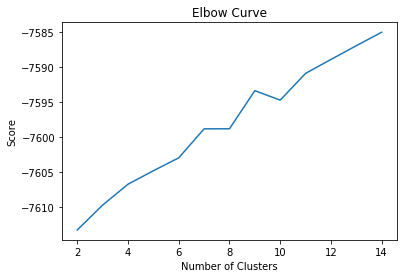

In [27]:
Nc = range(2, 15)

kmeans = [KMeans(n_clusters=i) for i in Nc]

kmeans

score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]

score

plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()